In [1]:
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from helpers import load_best_result, save_search_result
from loaders import load_mnist
from plotters import plot_learning_curve, plot_validation_curve

In [2]:
learner_type = 'ANN'

res = load_best_result('ANN')

In [3]:
res

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([ 3.49478356,  3.593033  ,  3.91809773,  3.22901416,  3.39511847,
         3.91257747,  3.03888265,  3.43251212,  3.00283639,  3.15932687,
         3.34746226,  3.44144797,  3.01078025,  3.33490237,  3.46872083,
         4.43732556,  3.76528939,  3.62438965,  3.26306399,  4.05612993]),
 'std_fit_time': array([ 0.1739969 ,  0.12537394,  0.22664877,  0.03212197,  0.06888544,
         0.07539559,  0.12827471,  0.10634412,  0.03733143,  0.07830137,
         0.1073287 ,  0.09684528,  0.29103558,  0.05304982,  0.06721448,
         0.06117679,  0.28723624,  0.16146702,  0.1045289 ,  0.58285539]),
 'mean_score_time': array([ 0.41166234,  0.36911186,  0.43058793,  0.43770425,  0.44712504,
         0.50696301,  0.48108228,  0.52611669,  0.54501685,  0.58960517,
         0.62253745,  0.65175072,  0.63898921,  0.68729218,  0.76389686,
         0.85472178,  0.80897466,  0.84411748,  0.85079575,  0.88795455]),
 'std_score_time': array([ 0.08040375,  0.01946415,  0.02223602,  

In [4]:
len(res['params'])

20

In [7]:
res['params'][np.argmin(res['mean_test_score'])]

{'hidden_layer_sizes': (392, 588),
 'learning_rate_init': 0.20316154694807931,
 'momentum': 0.93237525900776286}

In [8]:
res['params'][np.argmax(res['mean_test_score'])]

{'hidden_layer_sizes': (392, 392),
 'learning_rate_init': 0.21192892286258413,
 'momentum': 0.05980593357228059}

In [12]:
np.max(res['param_momentum'])

0.93237525900776286

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


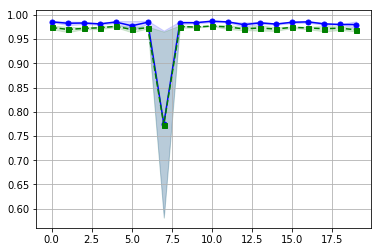

In [11]:
x_index = range(len(train_mean))
train_mean = res['mean_train_score']
train_std = res['std_train_score']
test_mean = res['mean_test_score']
test_std = res['std_test_score']
plt.plot(x_index, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(x_index, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(x_index, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(x_index,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()